<a href="https://colab.research.google.com/github/isaacdavii/Trabalho_IA_MachineLearning/blob/main/Trabalho_IA_Grupo_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho da disciplina de IA

---

### Professora:
*   Isabela Neves Drummond

### Alunos:
* Isaac Davi Mendonça Viana - 2023000650
* Kaio Magno Cezário de Cássio - 2023007650
* Marcos Eduardo Alves de Souza - 2023010155
* Pedro Paulo Araujo Carvalho - 2023000909
* Samuel Guedes Nascimento - 2023012991

---


```
Data da apresentação 18/06/24
```



O conjunto de dados utilizado neste notebook é traz informações sobre apartamentos de Moscou. O objetivo é, a partir dos dados dos apartamentos, definir se ele é um imóvel `novo` ou `não`.

 Atributos dos dados:

- min_metro: Minutos do apartamento até o metrô mais próximo
- area_total: Área construída do imóvel
- area_util: Área utilizável do imóvel
- andar: Andar em que se encontra o imóvel
- pe_direito: Altura do piso ao teto do imóvel
- numero_comodos: Quantidade de cômodos
- novo: Indica se o apartamento é novo (1) ou não (0)

O conjunto de dados foi importado pelo Google Drive e sua carga é feita em um DataFrame Pandas.

In [ ]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabalho_IA_Isabela/apartamentos.csv')
df.head()

,min_metro,area_total,area_util,andar,novo,pe_direito,numero_comodos
0,24.0,64.20,32.4,11.0,1.0,3.15,2.0
1,5.0,72.40,33.6,3.0,1.0,3.15,2.0
2,27.0,66.90,24.8,9.0,1.0,3.00,2.0
3,20.0,66.00,29.9,8.0,1.0,3.00,2.0
4,5.0,65.55,34.4,26.0,1.0,2.87,2.0


### Carregando e explorando o dataset

In [ ]:
# Exibir as primeiras linhas do conjunto de dados
print(df.head())
print()

# Exibir informações gerais sobre o dataset
print(df.info())
print()

# Verificar estatísticas descritivas
print(df.describe())

   min_metro  area_total  area_util  andar  novo  pe_direito  numero_comodos
0       24.0       64.20       32.4   11.0   1.0        3.15             2.0
1        5.0       72.40       33.6    3.0   1.0        3.15             2.0
2       27.0       66.90       24.8    9.0   1.0        3.00             2.0
3       20.0       66.00       29.9    8.0   1.0        3.00             2.0
4        5.0       65.55       34.4   26.0   1.0        2.87             2.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   min_metro       2985 non-null   float64
 1   area_total      2985 non-null   float64
 2   area_util       2985 non-null   float64
 3   andar           2985 non-null   float64
 4   novo            2985 non-null   float64
 5   pe_direito      2985 non-null   float64
 6   numero_comodos  2985 non-null   float64
dtypes: float64(7)
memory 

### Pré-processamento dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y) colocando "novo" como alvo
X = df.drop('novo', axis = 1)
y = df['novo']

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)


### Treinar o modelo Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Treinar o modelo Naive Bayes
model = MultinomialNB()
model.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_teste)


### Avaliar a performance do modelo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliar o modelo
accuracy = accuracy_score(y_teste, y_pred)
report = classification_report(y_teste, y_pred)
conf_matrix = confusion_matrix(y_teste, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print()
print(f'Relatório de Classificação:\n{report}')
print()
print(f'Matriz de Confusão:\n{conf_matrix}')


Acurácia: 0.65

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       580
         1.0       1.00      0.01      0.02       316

    accuracy                           0.65       896
   macro avg       0.82      0.50      0.40       896
weighted avg       0.77      0.65      0.52       896


Matriz de Confusão:
[[580   0]
 [313   3]]


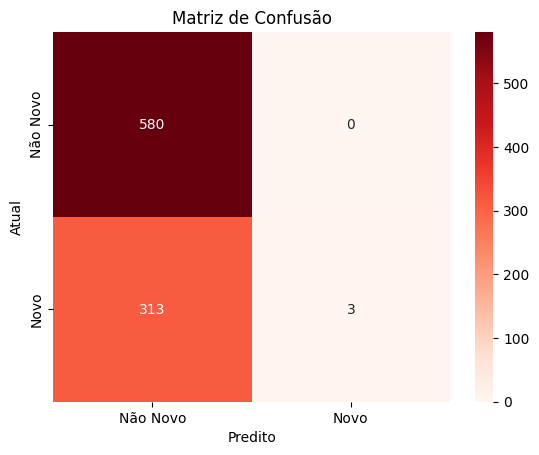

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Reds", xticklabels = ['Não Novo', 'Novo'], yticklabels = ['Não Novo', 'Novo'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()


### Interpretação



#### Acurácia
- **Acurácia de 65.07%**: O modelo prevê corretamente se um apartamento é novo ou não em 65.07% dos casos.

#### Precisão e Revocação
- **Classe 0 (apartamentos não novos)**:
- **Precisão**: 0.65 - 65% das previsões que o modelo fez como "não novo" estão corretas.
- **Revocação**: 1.00 - 100% dos apartamentos que realmente não são novos foram identificados corretamente.
- **F1-Score**: 0.79 - Média harmônica entre precisão e revocação para a classe 0.

- **Classe 1 (apartamentos novos)**:
- **Precisão**: 1.00 - 100% das previsões que o modelo fez como "novo" estão corretas.
- **Revocação**: 0.01 - Apenas 1% dos apartamentos que realmente são novos foram identificados corretamente.
- **F1-Score**: 0.02 - Média harmônica entre precisão e revocação para a classe 1.

#### Desempenho do Modelo
- **Alta precisão para a classe 1**: Quando o modelo prevê que um apartamento é novo, ele está correto. No entanto, essa precisão alta é enganosa devido ao número extremamente baixo de previsões para essa classe (apenas 3 verdadeiros positivos).
- **Baixa revocação para a classe 1**: O modelo falha em identificar a maioria dos apartamentos novos, indicando que está tendencioso para prever apartamentos como não novos.
- **Alta revocação para a classe 0**: O modelo identifica quase todos os apartamentos não novos corretamente, mas isso também significa que está superestimando a classe 0 em detrimento da classe 1.

### Conclusão
- **Desempenho Desequilibrado**: O modelo tem um desempenho desequilibrado, sendo bom em identificar apartamentos não novos, mas péssimo em identificar apartamentos novos. Isso sugere um desequilíbrio de classes no conjunto de dados, onde a classe de apartamentos não novos pode estar super-representada.
- **Necessidade de Melhorias:**
  - **Balanceamento de Dados**: Métodos como oversampling da classe minoritária (apartamentos novos) ou undersampling da classe majoritária (apartamentos não novos) podem ajudar.
  - **Modelo Alternativo**: Testar outros modelos de classificação que possam lidar melhor com o desequilíbrio, como Random Forest ou Gradient Boosting.
  - **Feature Engineering**: Criar novas features ou transformar as existentes para melhorar a representatividade dos dados.

### Próximos Passos
1. **Análise de Balanceamento de Dados**: Verificar a distribuição das classes e aplicar técnicas de balanceamento.
2. **Exploração de Outros Modelos**: Testar e comparar outros algoritmos de classificação.
3. **Feature Engineering**: Melhorar a qualidade das features para ajudar na classificação.

### Matriz de Confusão EXPLICADA


            

```
                  Predito 0   Predito 1

Real 0 (Negativo)   TN (True Negative)    FP (False Positive)
Real 1 (Positivo)   FN (False Negative)   TP (True Positive)
```



Elementos da Matriz de Confusão

    True Positive (TP): Número de amostras que são positivamente classificadas corretamente (classe real 1, predição 1).
    True Negative (TN): Número de amostras que são negativamente classificadas corretamente (classe real 0, predição 0).
    False Positive (FP): Número de amostras que são negativamente classificadas incorretamente como positivas (classe real 0, predição 1).
    False Negative (FN): Número de amostras que são positivamente classificadas incorretamente como negativas (classe real 1, predição 0).

  Pelo nosso resultado temos:

    True Negatives (TN): 580 (apartamentos que não são novos e foram corretamente classificados como não novos)
    False Positives (FP): 0 (apartamentos que não são novos e foram incorretamente classificados como novos)
    False Negatives (FN): 313 (apartamentos que são novos e foram incorretamente classificados como não novos)
    True Positives (TP): 3 (apartamentos que são novos e foram corretamente classificados como novos)